The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


Median value of owner-occupied homes" provide a boxplot

# as we can see the value throgh code and in box plot median line is near 20-21. and maximum value is 38.
# we also observe that there are so many outliers above maximum and below minumim and it is rightly skewed data.

21.2


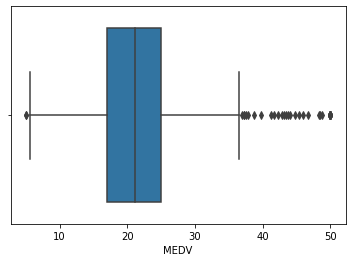

In [4]:
sns.boxplot('MEDV', data = boston_df)

print(boston_df['MEDV'].median())


Provide a  histogram for the Charles river variable

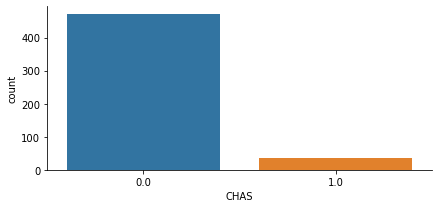

In [5]:
sns.catplot(x='CHAS',
            kind='count', data=boston_df,
            height = 3, aspect = 2)
#Charles River dummy variable (1 if tract bounds river; 0 otherwise)


Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [6]:
#Converted age variable into 3 discrete variables for further visualization
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_GROUP'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GROUP'] = '70 years and older'

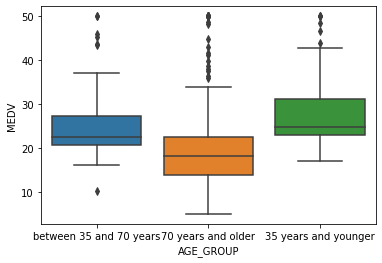

In [17]:
sns.boxplot(x = 'AGE_GROUP', y = 'MEDV', data = boston_df)


# avg is ~25 of people who are in age group 35 and younger lies in owner occipied homes.
# avg is ~19 of people who are in older than 70 year  are less but there so many outliers.
# avg is ~22 of 35 and 70 year who are  

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

,NOX,INDUS
NOX,1.000000,0.763651
INDUS,0.763651,1.000000


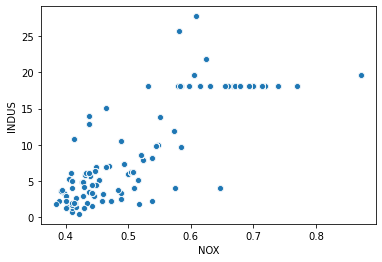

In [7]:
sns.scatterplot(x = 'NOX', y = 'INDUS', data = boston_df)

boston_df[['NOX','INDUS']].corr()



# There is strong realtionship and it does effect each other. 

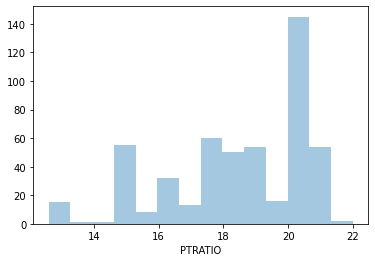

In [8]:
sns.distplot(boston_df['PTRATIO'], kde = False)

<b>1)Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)</b>
#alpha = 0.5 H0 = variances are equal Ha = varainces are not equal

In [9]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

since the p-value is less than 0.05 we can assume there is clear evidence that variances are not equal.

alpha = 0.5 H0 = significant difference in median value of houses bounded by the charles river or not. Ha = There is no significant difference in median value houses bounded by the charles river or not.

In [10]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0.0]['MEDV'], equal_var = False)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

Since p-value is less 5% , so we will reject our null hypothesis as there is no clear evidence of diffrence in avg value of houses by the charles river.

<b>2) Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [11]:
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'AGE_GROUP'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GROUP'] = '70 years and older'

alpha = 0.5 H0 = Variances are equal with respect to MEDV. Ha = Variances are not equal with respect to MEDV.

In [12]:
scipy.stats.levene(boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

P-value si greater than 5% so we are fail to reject the null hypothesis.

**H0** : no difference in average of age with respect to median value of house. all means are equal.
Ha : Atleast one different from other
alpha = 5% 

In [13]:
f_statistic, p_value = scipy.stats.f_oneway(boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV'], 
                   )
print("f_ statistic is {} and p_value is {}".format(f_statistic, p_value))

f_ statistic is 36.40764999196599 and p_value is 1.7105011022702984e-15


As p value is less tha 5% so we will reject the null hypotheis as there is clear evidence that there is atleast one mean is significantly different from others.

<b>3) Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation</b>

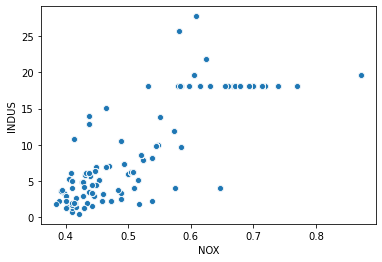

In [14]:
import seaborn as sns
sns.scatterplot(x = 'NOX', y = 'INDUS', data = boston_df)

alpha = 5% H0 : Both are independent variables H1 : they are correlated variables

In [15]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.763651446920915, 7.913361061239593e-98)

 As pearson coef is 76% and p-value is less than 5% , so we will fail the null hypothesis as there is clear evidence of relationship between 2 variables. 

<b> 4 What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)</b>

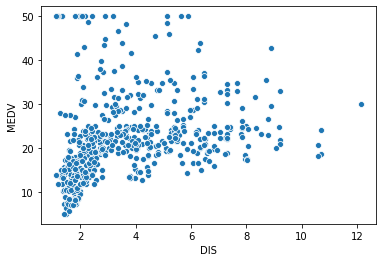

In [16]:
sns.scatterplot(x = 'DIS', y = 'MEDV', data = boston_df)

In [21]:
import statsmodels.api as sm
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 24 Mar 2021   Prob (F-statistic):           1.21e-08
Time:                        10:08:06   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As p value is less 5% then that means we reject the null hypothesis that there is no impact of DIS on MEDV.

Trying one more pearson test on the folloing results

In [19]:
scipy.stats.pearsonr(boston_df['DIS'], boston_df['MEDV'])

(0.24992873408590394, 1.2066117273368359e-08)